# CDPR Quantitative Assessment
## By: Danyal Khattak

### Section 1: Data Cleaning

#### Question 1

In [661]:
# Question 1, Part A
import pandas as pd

# Loading the datasets
malawi_el = pd.read_stata("malawi_el.dta")
uganda_el = pd.read_stata("uganda_el.dta")
malawi_bl = pd.read_stata("malawi_bl.dta")
uganda_bl = pd.read_stata("uganda_bl.dta")

datasets = {
    "Malawi Endline": malawi_el,
    "Uganda Endline": uganda_el,
    "Malawi Baseline": malawi_bl,
    "Uganda Baseline": uganda_bl
}

columns_to_check = ['hhid', 'treatment', 'district', 'occ2_s_1', 'intdd', 'intmm']

for dataset_name, dataset in datasets.items():
    print(f"\n--- {dataset_name} ---")
    for col in columns_to_check:
        unique_count = dataset[col].nunique()
        print(f"Column: {col}, Number of unique values: {unique_count}")


# Answer to Question 1 Part A
    #The code iterates through the first six columns in each of the four datasets.
    #For each column, it calculates and prints the number of unique values and their frequency.
    #By examining the output for the hhid column, it was observed that the number of unique values matched the total number of entries in each dataset, and each hhid value appeared only once, indicating that there were no duplicate household IDs. 
    #This demonstrates that hhid serves as a unique identifier within each dataset.


--- Malawi Endline ---
Column: hhid, Number of unique values: 1950
Column: treatment, Number of unique values: 2
Column: district, Number of unique values: 32
Column: occ2_s_1, Number of unique values: 399
Column: intdd, Number of unique values: 24
Column: intmm, Number of unique values: 3

--- Uganda Endline ---
Column: hhid, Number of unique values: 1991
Column: treatment, Number of unique values: 2
Column: district, Number of unique values: 135
Column: occ2_s_1, Number of unique values: 229
Column: intdd, Number of unique values: 17
Column: intmm, Number of unique values: 2

--- Malawi Baseline ---
Column: hhid, Number of unique values: 2245
Column: treatment, Number of unique values: 2
Column: district, Number of unique values: 32
Column: occ2_s_1, Number of unique values: 430
Column: intdd, Number of unique values: 28
Column: intmm, Number of unique values: 8

--- Uganda Baseline ---
Column: hhid, Number of unique values: 2445
Column: treatment, Number of unique values: 2
Column:

In [662]:
# Question 1, Part B

malawi_el.insert(1, 'country', 'Malawi')
uganda_el.insert(1, 'country', 'Uganda')
malawi_bl.insert(1, 'country', 'Malawi')
uganda_bl.insert(1, 'country', 'Uganda')

malawi_el.insert(2, 'round', 1)
uganda_el.insert(2, 'round', 1)
malawi_bl.insert(2, 'round', 0)
uganda_bl.insert(2, 'round', 0)

combined_data = pd.concat([malawi_bl, malawi_el, uganda_bl, uganda_el], ignore_index=True)

print(combined_data.head())
print(combined_data.tail())

    hhid country  round  treatment             district occ2_s_1  intdd  \
0  15136  Malawi      0        0.0     Lilongwe City                8.0   
1  11232  Malawi      0        0.0            Balaka               19.0   
2  13524  Malawi      0        0.0           Karonga               15.0   
3  19479  Malawi      0        0.0            Nsanje               11.0   
4  20372  Malawi      0        0.0          Phalombe               30.0   

   intmm   intyy  lf8c1_01  lf8c1_02  lf8c1_03  lf8c1_04  lf8c1_05  lf8c1_06  \
0    2.0  2011.0       5.0       5.0       3.0       4.0       7.0       4.0   
1    2.0  2011.0       2.0       2.0       1.0       7.0       3.0       4.0   
2    3.0  2011.0       4.0       3.0       1.0       3.0       6.0       1.0   
3    2.0  2011.0       7.0       6.0       7.0       4.0       1.0       3.0   
4    3.0  2011.0       6.0       2.0       2.0       7.0       6.0       3.0   

   lf8c1_07  lf8c1_08  lf8c1_09  lf8c1_10  
0       5.0       2.0   

In [663]:
# Question 1, Part C

combined_data['round'] = combined_data['round'].replace({0: 'baseline', 1: 'endline'})
combined_data['treatment'] = combined_data['treatment'].replace({0: 'Control', 1: 'Treatment'})

combined_data['round'] = combined_data['round'].str.lower() 
malawi_baseline = combined_data[(combined_data['country'] == 'Malawi') & (combined_data['round'] == 'baseline')].copy()

# Due to issues with casesensitive words in labelling, I had to add in the malawi_baseline command

print(combined_data.head())
print(combined_data.tail())

    hhid country     round treatment             district occ2_s_1  intdd  \
0  15136  Malawi  baseline   Control     Lilongwe City                8.0   
1  11232  Malawi  baseline   Control            Balaka               19.0   
2  13524  Malawi  baseline   Control           Karonga               15.0   
3  19479  Malawi  baseline   Control            Nsanje               11.0   
4  20372  Malawi  baseline   Control          Phalombe               30.0   

   intmm   intyy  lf8c1_01  lf8c1_02  lf8c1_03  lf8c1_04  lf8c1_05  lf8c1_06  \
0    2.0  2011.0       5.0       5.0       3.0       4.0       7.0       4.0   
1    2.0  2011.0       2.0       2.0       1.0       7.0       3.0       4.0   
2    3.0  2011.0       4.0       3.0       1.0       3.0       6.0       1.0   
3    2.0  2011.0       7.0       6.0       7.0       4.0       1.0       3.0   
4    3.0  2011.0       6.0       2.0       2.0       7.0       6.0       3.0   

   lf8c1_07  lf8c1_08  lf8c1_09  lf8c1_10  
0       5.0 

In [664]:
# Question 1, Part D

combined_data['district'] = combined_data['district'].str.strip()

print(combined_data['district'].head())
print(combined_data['district'].tail())

#Answer to Part D:
has_leading_trailing_space = combined_data['district'].str.contains(r'^\s|\s$').any()
print("Does the district column have leading or trailing spaces?", has_leading_trailing_space)

# Output to the above command shows that there are no leading or trailing spaces, 
# The code uses a regular expression pattern r'^\s|\s$' to check for whitespace characters (\s) at the beginning (^) or end ($) of any string in the district column.

0    Lilongwe City
1           Balaka
2          Karonga
3           Nsanje
4         Phalombe
Name: district, dtype: object
8626    Rwampara
8627    Rwampara
8628    Rwampara
8629    Rwampara
8630    Rwampara
Name: district, dtype: object
Does the district column have leading or trailing spaces? False


In [665]:
# Question 1, Part E

new_names = {
    'lf8c1_01': 'agri_inputs_Avocado',
    'lf8c1_02': 'agri_inputs_Bananas',
    'lf8c1_03': 'agri_inputs_Beans',
    'lf8c1_04': 'agri_inputs_Cabbage',
    'lf8c1_05': 'agri_inputs_Carrots',
    'lf8c1_06': 'agri_inputs_Cassava',
    'lf8c1_07': 'agri_inputs_Cotton',
    'lf8c1_08': 'agri_inputs_Cucumber',
    'lf8c1_09': 'agri_inputs_Groundnut',
    'lf8c1_10': 'agri_inputs_Irish Potatoes'
}

combined_data = combined_data.rename(columns=new_names)

print(combined_data.tail())

       hhid country    round  treatment  district              occ2_s_1  \
8626  20688  Uganda  endline    Control  Rwampara                         
8627  20692  Uganda  endline    Control  Rwampara                         
8628  20715  Uganda  endline    Control  Rwampara  KULUKA MIKEKA (MATS)   
8629  20729  Uganda  endline    Control  Rwampara                         
8630  21011  Uganda  endline  Treatment  Rwampara                         

      intdd  intmm   intyy  agri_inputs_Avocado  agri_inputs_Bananas  \
8626    4.0    4.0  2013.0                  7.0                  1.0   
8627    5.0    4.0  2013.0                  7.0                  6.0   
8628   20.0    3.0  2013.0                  1.0                  4.0   
8629   15.0    3.0  2013.0                  4.0                  6.0   
8630   19.0    3.0  2013.0                  6.0                  3.0   

      agri_inputs_Beans  agri_inputs_Cabbage  agri_inputs_Carrots  \
8626                3.0                  7.0   

In [666]:
# Question 1, Part F

columns = [
    'agri_inputs_Avocado',
    'agri_inputs_Bananas',
    'agri_inputs_Beans',
    'agri_inputs_Cabbage',
    'agri_inputs_Carrots',
    'agri_inputs_Cassava',
    'agri_inputs_Cotton',
    'agri_inputs_Cucumber',
    'agri_inputs_Groundnut',
    'agri_inputs_Irish Potatoes'
]
labels = {
    '1.0': 'Nothing',
    '2.0': 'Hybrid Seeds',
    '3.0': 'Manure',
    '4.0': 'Fertilizer & Hybrid Seeds',
    '5.0': 'Manure & Hybrid Seeds',
    '6.0': 'Fertilizer & Manure',
    '7.0': 'Nothing'
}

for col in columns:
    combined_data[col] = combined_data[col].astype(str).replace(labels)

print(combined_data.head()) 

    hhid country     round treatment       district occ2_s_1  intdd  intmm  \
0  15136  Malawi  baseline   Control  Lilongwe City             8.0    2.0   
1  11232  Malawi  baseline   Control         Balaka            19.0    2.0   
2  13524  Malawi  baseline   Control        Karonga            15.0    3.0   
3  19479  Malawi  baseline   Control         Nsanje            11.0    2.0   
4  20372  Malawi  baseline   Control       Phalombe            30.0    3.0   

    intyy        agri_inputs_Avocado    agri_inputs_Bananas agri_inputs_Beans  \
0  2011.0      Manure & Hybrid Seeds  Manure & Hybrid Seeds            Manure   
1  2011.0               Hybrid Seeds           Hybrid Seeds           Nothing   
2  2011.0  Fertilizer & Hybrid Seeds                 Manure           Nothing   
3  2011.0                    Nothing    Fertilizer & Manure           Nothing   
4  2011.0        Fertilizer & Manure           Hybrid Seeds      Hybrid Seeds   

         agri_inputs_Cabbage  agri_inputs_Ca

In [667]:
# Question 1, Part G
print("Value counts for occupation column:")
print(combined_data['occ2_s_1'].value_counts())


Value counts for occupation column:
occ2_s_1
                             4731
MAIZE                         506
GROWING MAIZE                 293
GROW MAIZE                    246
COTTON                        121
MAIZE FARMER                  111
MAIZE FARMING                 109
FARMING                        73
FARMING MAIZE                  60
FARMING (MAIZE)                58
FARMING(MAIZE)                 49
FARMER MAIZE                   41
COTTON FARMING                 40
COTTON FARMER                  38
NO SECONDARY SOURCE            34
CASUAL LABOUR                  33
REMITTANCES                    30
BUILDER                        26
BICYCLE TAXI                   23
HOUSE WIFE                     19
SELLING FISH                   19
CULTIVATING MAIZE              19
SEASONAL LABOUR                19
SMALL SCALE FARMING            18
TOMATO                         18
HAWKER                         16
FISHERMAN                      16
GROWS MAIZE                    16
NO 

In [668]:
# Question 1, Part G continued

import numpy as np

def categorize_occupation_using_nlp(occ):
    if pd.isna(occ):
        return "Missing"
    occ = str(occ).upper().strip()

    if occ == "":
        return "Missing"

    # Tokenization
    stop_words = {"THE", "A", "AN", "AND", "IN", "IS", "OF", "FOR", "TO", "AT", "ON", "WITH"}
    tokens = [token.strip() for token in occ.split() if token.strip() not in stop_words]

    # Keywords with Prioritization
    agriculture_keywords = {"MAIZE", "COTTON", "FARM", "FARMING", "FARMER", "GARDEN", "RICE", "CASAVA",
                            "GROUNDNUTS", "TOBACCO", "VEGETABLES", "PEAS", "BEANS", "CABBAGE", "GROWS",
                            "CARROT", "SWEET", "POTATOES", "BANANA", "MANGO", "COWPEAS", "PIGEON",
                            "CASSAVA", "NANDOLO", "G/NUTS", "POTATO", "TOMATO", "OKRA", "ONIONS",
                            "PEPPER", "MILLET", "SUGARCANE", "COWPEAS", "YAMS", "PUMPKIN", "COFFEE","POULTRY", "PIGGERY",
                            "GOATS", "CATTLE", "LIVESTOCK", "CHICKEN", "CHICKENS", "DUCK", "DUCKS", "PIG",
                            "PIGS", "GOAT", "COW", "COWS","AGRICULTURE", "AGRICULTUR", "CULTIVAT", "CROP", "CROPS", "PEAS", "MILLET","TOMATOES"}

    business_keywords = {"SELL", "SELLING", "SHOP", "TRADER", "VENDOR", "BUSINESS", "OWNER", "RESTAURANT",
                         "BARBER", "HAIR", "HARDWARE", "RENTALS", "TRADE", "SALES", "SHOPKEEPER",
                         "STORE", "AGRI.", "AGRICUITUR", "GROCERY", "GROCERIES", "TEA", "ROOM", "MOBILE",
                         "SHOP", "CAKES", "BAKING", "BREWING", "BREW", "BAR", "CRAFT", "TRANSPORT", "TAXI",
                         "HIRE", "PLASTIC", "PESTICIDES", "STATIONERY", "TIMBER", "BRICKS", "BRICK",
                         "CHARCOAL", "WOODEN", "DOORS", "FRAMES", "MATS", "HATS", "CLOTH", "CLOTHES",
                         "TAILOR", "SALOON", "CEMENT", "PARAFIN", "SPARE", "PARTS", "ASSORTED", "ITEMS",
                         "PLATES", "TEA", "COOKED", "FOODS", "FOOD", "STAF", "STUFFS",  "VENDING", "VENDOR","BUILDER"}

    employee_keywords = {"EMPLOYEE", "OFFICER", "TEACHER", "NURSE", "ASSISTANT", "LABOUR", "LABOR", "GUARD",
                         "CASHIER", "PASTORING", "DRIVER", "MECHANIC", "WELDER", "CLERK", "SECRETARY",
                         "SUPERVISOR", "MANAGER", "RECEPTIONIST", "CLEANER", "MESSENGER", "HOUSE", "BOY",
                         "HOUSE", "MAIDE", "HOUSEKEEPER", "WAITER", "COOK", "PLUMBER", "ELECTRICIAN",
                         "CARPENTER", "PAINTER", "PORTER", "HAIRDRESSING", "BARBER", "KNITTING", "KNIT",
                         "WEAVING", "WEAVES", "SAW", "SAWING", "WORKER", "WORKS", "WORKING"}

    unpaid_keywords = {"UNPAID", "HOUSEWIFE", "HELP", "ASSISTANCE", "ASSISTED", "ASSIST", "HOMEMAKER"}

    # Prioritize Agriculture
    if any(keyword in tokens for keyword in agriculture_keywords):
        return "Agriculture"
    elif any(keyword in tokens for keyword in business_keywords):
        return "Business Owner"
    elif any(keyword in tokens for keyword in employee_keywords):
        return "Employee"
    elif any(keyword in tokens for keyword in unpaid_keywords):
        return "Unpaid"
    else:
        return "Other"

combined_data["categorize_occupation_using_nlp"] = combined_data["occ2_s_1"].apply(
    categorize_occupation_nlp_expanded
)

print(combined_data["categorize_occupation_using_nlp"].value_counts())

# Testing how well the code works:
# Taking a sample of 50 random rows, skipping those with missing values
sample_df = combined_data[combined_data['occ2_s_1'].notna() & (combined_data['occ2_s_1'] != "")].sample(50)

# Testing how well the algorithm is working by printing the original occupation and the categorized occupation
for index, row in sample_df.iterrows():
    print(f"Original: {row['occ2_s_1']}\nCategorized: {row['categorize_occupation_using_nlp']}\n")


#Answer to Question 1, Part G
#Explanation for the algorithm used:
    # First, I handle missing or empty occupation entries by labeling them as "Missing."
    # Then, I clean the occupation text by making it uppercase and removing extra spaces. This ensures consistency.
    # Next, I tokenize the cleaned text (split it into individual words) and remove common words (stop words) that don't help with categorization.
    # The list of words I have used to train the model is not at all exhaustive and more robust measures can be taken to complete this task more effectively. 
    # The core of the categorization is done through a series of if and elif statements. I've defined sets of keywords for each category: "Agriculture," "Business Owner," "Employee," and "Unpaid."
    # I check if any of the keywords from a category are present in the cleaned occupation text.
    # I've prioritized the categories. For example, if an occupation mentions both "FARMING" and "SELLING," I categorize it as "Agriculture." This helps resolve ambiguities.
    # Finally, if an occupation doesn't match any of the defined categories, I label it as "Other."

# Reasoning for using NLP for this particular task:    
    # The code systematically goes through each occupation description and assigns it to one of the given categories.
    # It uses a combination of keyword matching, text cleaning, and category prioritization to handle the open-ended nature of the occupation data.
    # The use of NLP techniques like tokenization and stop word removal improves the accuracy and robustness of the categorization compared to simple string matching.

# Testing how well the code is working:
    # The snippet takes a small subset of the sample and shows how it was categorized.
    # Allows for a visual inspecation of the data and ensures randomness. 

# More robust ways of checking how well the classification is done:
    # Through the use of a confusion matrix, which will check the categories assigned against a pre-made column.
    # Which will allow me to see which categories are being confused with each other and which have a high false-positive or negative rates. 

categorize_occupation_using_nlp
Missing           4731
Agriculture       2483
Other              778
Business Owner     467
Employee           147
Unpaid              25
Name: count, dtype: int64
Original: COTTON
Categorized: Agriculture

Original: GROWING MAIZE
Categorized: Agriculture

Original: GROWS COTTON
Categorized: Agriculture

Original: VENDORS
Categorized: Other

Original: DRIVER
Categorized: Employee

Original: GROW MAIZE
Categorized: Agriculture

Original: NO SECONDARY SOURCE
Categorized: Other

Original: GROWING MAIZE.
Categorized: Other

Original: CASUAL LABOURER(GARDEN B
Categorized: Other

Original: MASAF
Categorized: Other

Original: CASUAL LABOUR
Categorized: Employee

Original: GROW MAIZE
Categorized: Agriculture

Original: FARMING
Categorized: Agriculture

Original: GROW MAIZE
Categorized: Agriculture

Original: SEASONAL WORKER
Categorized: Employee

Original: FARMING (MAIZE)
Categorized: Agriculture

Original: FARMING MAIZE
Categorized: Agriculture

Original: BICYC

In [669]:
# Question 1, Part H

import pandas as pd
# Filtering for Malawi and baseline round
malawi_baseline = combined_data[(combined_data['country'] == 'Malawi') & (combined_data['round'] == 'baseline')].copy()

# Getting the value counts of each occupation category
if 'categorize_occupation_using_nlp' in malawi_baseline.columns:
    occupation_counts = malawi_baseline['categorize_occupation_using_nlp'].value_counts()
else:
    print("Error: The column 'categorize_occupation_using_nlp' does not exist in the DataFrame.")
    occupation_counts = pd.Series() 

# Calculating percentages
occupation_percentages = (occupation_counts / occupation_counts.sum()) * 100

# Creating a DataFrame for the results
results_df = pd.DataFrame({'Category': occupation_percentages.index, 'Percentage': occupation_percentages.values})

# Exporting the DataFrame to an Excel file
results_df.to_excel("occupation_percentages_malawi_baseline.xlsx", index=False)

print("Excel file 'occupation_percentages_malawi_baseline.xlsx' created.")

Excel file 'occupation_percentages_malawi_baseline.xlsx' created.


In [670]:
# Question 1, Part H Continued

print("Malawi Baseline Shape:", malawi_baseline.shape)
print(malawi_baseline.head())

# Checking the dataset for potential dimensionality issues with the final output. 
malawi_only = combined_data[combined_data['country'] == 'Malawi']
print("\nMalawi Only Shape:", malawi_only.shape)
print("\nMalawi Only 'round' values:", malawi_only['round'].unique()) 

# Checking round filter
baseline_only = combined_data[combined_data['round'] == 'baseline']
print("\nBaseline Only Shape:", baseline_only.shape)
print("\nBaseline Only 'country' values:", baseline_only['country'].unique()) 

# Checking combined filter
malawi_baseline = combined_data[(combined_data['country'] == 'Malawi') & (combined_data['round'] == 'baseline')]
print("\nMalawi Baseline Shape:", malawi_baseline.shape)

Malawi Baseline Shape: (2245, 20)
    hhid country     round treatment       district occ2_s_1  intdd  intmm  \
0  15136  Malawi  baseline   Control  Lilongwe City             8.0    2.0   
1  11232  Malawi  baseline   Control         Balaka            19.0    2.0   
2  13524  Malawi  baseline   Control        Karonga            15.0    3.0   
3  19479  Malawi  baseline   Control         Nsanje            11.0    2.0   
4  20372  Malawi  baseline   Control       Phalombe            30.0    3.0   

    intyy        agri_inputs_Avocado    agri_inputs_Bananas agri_inputs_Beans  \
0  2011.0      Manure & Hybrid Seeds  Manure & Hybrid Seeds            Manure   
1  2011.0               Hybrid Seeds           Hybrid Seeds           Nothing   
2  2011.0  Fertilizer & Hybrid Seeds                 Manure           Nothing   
3  2011.0                    Nothing    Fertilizer & Manure           Nothing   
4  2011.0        Fertilizer & Manure           Hybrid Seeds      Hybrid Seeds   

         a

In [671]:
# Question 1, Part I

import os
import tempfile

# Creatig a temporary file path
with tempfile.NamedTemporaryFile(mode='w', delete=False, suffix='.csv') as temp_csv:
    temp_file_path = temp_csv.name
    combined_data.to_csv(temp_file_path, index=False, encoding='utf-8')

print(f"{temp_file_path}")


# I used the tempfile and os.rename code because I was having trouble getting the CSV file to save correctly with the name 'master.csv'. 
# Even though I was using the to_csv function, Excel was interfering and saving the file as 'master.csv.xls'. 
# This was happening because Excel was trying to recognize the file content and taking over the save process.

C:\Users\danyal\AppData\Local\Temp\tmp4li80uye.csv


#### Question 2

In [673]:
# Question 2, Part A
master_df = pd.read_csv('master.csv')

baseline_ids = master_df[master_df['round'] == 'baseline'].groupby('country')['hhid'].unique()
endline_ids = master_df[master_df['round'] == 'endline'].groupby('country')['hhid'].unique()

attrition_rates = {}
for country in baseline_ids.index:
    baseline_count = len(baseline_ids[country])
    endline_count = len(endline_ids[country]) if country in endline_ids else 0
    attrition_rate = ((baseline_count - endline_count) / baseline_count) * 100
    attrition_rates[country] = attrition_rate

for country, rate in attrition_rates.items():
    print(f"Attrition rate for {country}: {rate:.2f}%")

Attrition rate for Malawi: 13.14%
Attrition rate for Uganda: 18.57%


In [674]:
# Question 2, Part B


master_df = pd.read_csv('master.csv')

baseline_ids = master_df[master_df['round'] == 'baseline'].groupby(['country', 'treatment'])['hhid'].unique()
endline_ids = master_df[master_df['round'] == 'endline'].groupby(['country', 'treatment'])['hhid'].unique()

attrition_rates = {}
for country_treatment in baseline_ids.index:
    country = country_treatment[0]
    treatment = country_treatment[1]
    baseline_count = len(baseline_ids[country_treatment])
    endline_count = len(endline_ids[country_treatment]) if country_treatment in endline_ids else 0
    attrition_rate = ((baseline_count - endline_count) / baseline_count) * 100
    attrition_rates[country_treatment] = attrition_rate

for country_treatment, rate in attrition_rates.items():
    country = country_treatment[0]
    treatment = country_treatment[1]
    print(f"Attrition rate for {country}, treatment {treatment}: {rate:.2f}%")

Attrition rate for Malawi, treatment Control: 12.16%
Attrition rate for Malawi, treatment Treatment: 14.17%
Attrition rate for Uganda, treatment Control: 18.17%
Attrition rate for Uganda, treatment Treatment: 18.98%


Question 2, Part C

Uganda has a higher attrition rate in both the control and treatment groups compared to Malawi. 
The attrition rates in Uganda are around 18%, while in Malawi, they are around 12-14%. 
This indicates a clear asymmetry, with Uganda experiencing greater attrition.
In both countries, the treatment group has a slightly higher attrition rate than the control group. 
However, the difference between treatment and control within each country is relatively small.

#### Question 3

In [677]:
# Question 3, Part A

# Getting the years for baseline and endline rounds for each country
years = master_df.groupby(['country', 'round'])['intyy'].unique()

for country_round, year_values in years.items():
    country = country_round[0]
    round_type = country_round[1]
    year = int(year_values[0])  # Convert year to integer to remove decimal
    print(f"Country: {country}, Round: {round_type}, Year: {year}")

Country: Malawi, Round: baseline, Year: 2011
Country: Malawi, Round: endline, Year: 2013
Country: Uganda, Round: baseline, Year: 2010
Country: Uganda, Round: endline, Year: 2013


In [678]:
# Question 3, Part B

# Defining the years and age ranges
malawi_year = 2011
uganda_year = 2010
age_ranges = ["1519", "2024", "2529", "3034", "3539", "4044", "4549", "5054", "5559", "6064"]


malawi_census = pd.ExcelFile("malawi_census.xlsx")
uganda_census = pd.ExcelFile("uganda_census.xlsx")

# Printing Malawi working age population variable names
print("Malawi Working Age Population Variable Names:")
for age_range in age_ranges:
    variable_name = f"B{age_range}_{malawi_year}"
    print(variable_name)

# Printing Uganda working age population variable names
print("\nUganda Working Age Population Variable Names:")
for age_range in age_ranges:
    variable_name = f"B{age_range}_{uganda_year}"
    print(variable_name)

# By looking at the Data Dictionary, I found out the convention used for naming the variables and simply used that in my functions.

Malawi Working Age Population Variable Names:
B1519_2011
B2024_2011
B2529_2011
B3034_2011
B3539_2011
B4044_2011
B4549_2011
B5054_2011
B5559_2011
B6064_2011

Uganda Working Age Population Variable Names:
B1519_2010
B2024_2010
B2529_2010
B3034_2010
B3539_2010
B4044_2010
B4549_2010
B5054_2010
B5559_2010
B6064_2010


In [679]:
# Question 3, Part B Continued

# Combining dataset to get variable for working population.

# Extracting Uganda data
uganda_data = uganda_census.parse("2000 - 2025", header=3) 

# Extracting Malawi data
malawi_data_2011 = malawi_census.parse("2011", header=3) 

# --- Malawi ---
# Extracting working age population columns
malawi_working_age_cols = [f"B{age_range}_{malawi_year}" for age_range in age_ranges]
malawi_working_age_data = malawi_data_2011[malawi_working_age_cols]

# Calculateing working_pop
malawi_data_2011['working_pop'] = malawi_working_age_data.sum(axis=1)

# Selecting relevant columns
malawi_data_2011 = malawi_data_2011[[f"BTOTL_{malawi_year}", 'working_pop', 'AREA_NAME']] 
# --- Uganda ---
# Extracting working age population columns
uganda_working_age_cols = [f"B{age_range}_{uganda_year}" for age_range in age_ranges]
uganda_working_age_data = uganda_data[uganda_working_age_cols]

# Calculating working_pop
uganda_data['working_pop'] = uganda_working_age_data.sum(axis=1)

# Selecting relevant columns
uganda_data = uganda_data[[f"BTOTL_{uganda_year}", 'working_pop', 'AREA_NAME']] 


print("Malawi data with working_pop:")
print(malawi_data_2011.head())

print("\nUganda data with working_pop:")
print(uganda_data.head())

Malawi data with working_pop:
   BTOTL_2011  working_pop       AREA_NAME
0    15879252      8295889          MALAWI
1      379158       190351         .BALAKA
2      391669       209765       .BLANTYRE
3      802415       483121  .BLANTYRE CITY
4      514722       264990       .CHIKWAWA

Uganda data with working_pop:
   BTOTL_2010  working_pop   AREA_NAME
0    31002201     14490271      UGANDA
1       47334        30592  .KALANGALA
2     1412927       875525    .KAMPALA
3      135547        63076     .KIBOGA
4      420289       196644     .LUWERO


In [680]:
# Question 3, Part B Continued

# Creatig Prop variable from the data
malawi_data_2011['prop'] = malawi_data_2011['working_pop'] / malawi_data_2011[f"BTOTL_{malawi_year}"]

uganda_data['prop'] = uganda_data['working_pop'] / uganda_data[f"BTOTL_{uganda_year}"]

print("Malawi data:")
print(malawi_data_2011.head())

print("\nUganda data:")
print(uganda_data.head())

Malawi data:
   BTOTL_2011  working_pop       AREA_NAME      prop
0    15879252      8295889          MALAWI  0.522436
1      379158       190351         .BALAKA  0.502036
2      391669       209765       .BLANTYRE  0.535567
3      802415       483121  .BLANTYRE CITY  0.602084
4      514722       264990       .CHIKWAWA  0.514822

Uganda data:
   BTOTL_2010  working_pop   AREA_NAME      prop
0    31002201     14490271      UGANDA  0.467395
1       47334        30592  .KALANGALA  0.646301
2     1412927       875525    .KAMPALA  0.619653
3      135547        63076     .KIBOGA  0.465344
4      420289       196644     .LUWERO  0.467878


In [681]:
# Question 3, Part B Continued

# Constructing "round"
malawi_data_2011['round'] = 0

# Creating a list of years in the Uganda data
years_in_uganda_data = [int(year.split('_')[-1]) for year in uganda_data.columns if 'BTOTL_' in year]

#Assigning 0 to the baseline year
uganda_data['round'] = 0
uganda_data.loc[uganda_data['BTOTL_2010'].notnull(), 'round'] = 0

# Printing Malawi round values
print("\nMalawi round values for 2011:")
print(malawi_data_2011[['AREA_NAME', 'round']].head()) 

# Printing Uganda round values for specific years
print("\nUganda round values for 2010:")
print(uganda_data[uganda_data['BTOTL_2010'].notnull()][['AREA_NAME', 'round']].head())



Malawi round values for 2011:
        AREA_NAME  round
0          MALAWI      0
1         .BALAKA      0
2       .BLANTYRE      0
3  .BLANTYRE CITY      0
4       .CHIKWAWA      0

Uganda round values for 2010:
    AREA_NAME  round
0      UGANDA      0
1  .KALANGALA      0
2    .KAMPALA      0
3     .KIBOGA      0
4     .LUWERO      0


In [682]:
# Question 3, Part B Continued

# Renaming AREA_NAME to district and creating country variables
malawi_data_2011 = malawi_data_2011.rename(columns={'AREA_NAME': 'district'})

# Cleaning district names
malawi_data_2011['district'] = malawi_data_2011['district'].str.strip()  # Remove leading/trailing spaces
malawi_data_2011['district'] = malawi_data_2011['district'].str.replace(' +', ' ', regex=True)  # Replace multiple spaces with single space

malawi_data_2011['country'] = 'Malawi'

# --- Uganda ---

# Renaming AREA_NAME to district
uganda_data = uganda_data.rename(columns={'AREA_NAME': 'district'})

# Cleaning district names
uganda_data['district'] = uganda_data['district'].str.strip()  # Remove leading/trailing spaces
uganda_data['district'] = uganda_data['district'].str.replace(' +', ' ', regex=True)  # Replace multiple spaces with single space

uganda_data['country'] = 'Uganda'

# Printing headers to check that the rename was successful
print(malawi_data_2011.columns)
print(uganda_data.columns)

Index(['BTOTL_2011', 'working_pop', 'district', 'prop', 'round', 'country'], dtype='object')
Index(['BTOTL_2010', 'working_pop', 'district', 'prop', 'round', 'country'], dtype='object')


In [684]:
# Question 3, Part B Continued

# Defining the endline years and age ranges
malawi_year = 2013
uganda_year = 2013
age_ranges = ["1519", "2024", "2529", "3034", "3539", "4044", "4549", "5054", "5559", "6064"]

# Printing Malawi working age population variable names
print("Malawi Working Age Population Variable Names (Endline):")
for age_range in age_ranges:
    variable_name = f"B{age_range}_{malawi_year}"
    print(variable_name)

# Printing Uganda working age population variable names
print("\nUganda Working Age Population Variable Names (Endline):")
for age_range in age_ranges:
    variable_name = f"B{age_range}_{uganda_year}"
    print(variable_name)


Malawi Working Age Population Variable Names (Endline):
B1519_2013
B2024_2013
B2529_2013
B3034_2013
B3539_2013
B4044_2013
B4549_2013
B5054_2013
B5559_2013
B6064_2013

Uganda Working Age Population Variable Names (Endline):
B1519_2013
B2024_2013
B2529_2013
B3034_2013
B3539_2013
B4044_2013
B4549_2013
B5054_2013
B5559_2013
B6064_2013


In [685]:
# Question 3, Part B Continued

# Combining datasets to get variables for working population in endline year

# Extracting Malawi endline data
malawi_data_2013 = malawi_census.parse("2013", header=3) 

# Extracting Uganda data
uganda_data_2013 = uganda_census.parse("2000 - 2025", header=3) 

# --- Malawi ---
# Extracting working age population columns
malawi_working_age_cols = [f"B{age_range}_{malawi_year}" for age_range in age_ranges]
malawi_working_age_data = malawi_data_2013 [malawi_working_age_cols]

# Calculateing working_pop
malawi_data_2013['working_pop'] = malawi_working_age_data.sum(axis=1)

# Selecting relevant columns
malawi_data_2013 = malawi_data_2013[[f"BTOTL_{malawi_year}", 'working_pop', 'AREA_NAME']] 

# --- Uganda ---
# Extracting working age population columns
uganda_working_age_cols = [f"B{age_range}_{uganda_year}" for age_range in age_ranges]
uganda_working_age_data = uganda_data_2013[uganda_working_age_cols]

# Calculating working_pop
uganda_data_2013['working_pop'] = uganda_working_age_data.sum(axis=1)

# Selecting relevant columns
uganda_data_2013 = uganda_data_2013[[f"BTOTL_{uganda_year}", 'working_pop', 'AREA_NAME']] 


print("Malawi data with working_pop:")
print(malawi_data_2013.head())

print("\nUganda data with working_pop:")
print(uganda_data_2013.head())


Malawi data with working_pop:
   BTOTL_2013  working_pop       AREA_NAME
0    16777547      8831419          MALAWI
1      396327       200412         .BALAKA
2      399159       215209       .BLANTYRE
3      847267       513457  .BLANTYRE CITY
4      534884       277418       .CHIKWAWA

Uganda data with working_pop:
   BTOTL_2013  working_pop   AREA_NAME
0    33809577     15983933      UGANDA
1       52632        34358  .KALANGALA
2     1490868       931935    .KAMPALA
3      145609        68546     .KIBOGA
4      449638       212684     .LUWERO


In [686]:
# Question 3, Part B Continued

# Creating Prop variable from the data for endline year
malawi_data_2013['prop'] = malawi_data_2011['working_pop'] / malawi_data_2013[f"BTOTL_{malawi_year}"]

uganda_data_2013['prop'] = uganda_data_2013['working_pop'] / uganda_data_2013[f"BTOTL_{uganda_year}"]

print(malawi_data_2013.head())

print(uganda_data_2013.head())

Malawi data:
   BTOTL_2013  working_pop       AREA_NAME      prop
0    16777547      8831419          MALAWI  0.494464
1      396327       200412         .BALAKA  0.480288
2      399159       215209       .BLANTYRE  0.525517
3      847267       513457  .BLANTYRE CITY  0.570211
4      534884       277418       .CHIKWAWA  0.495416

Uganda data:
   BTOTL_2013  working_pop   AREA_NAME      prop
0    33809577     15983933      UGANDA  0.472763
1       52632        34358  .KALANGALA  0.652797
2     1490868       931935    .KAMPALA  0.625096
3      145609        68546     .KIBOGA  0.470754
4      449638       212684     .LUWERO  0.473012


In [687]:
# Question 3, Part B Continued

# Constructing "round" for endline year
malawi_data_2013['round'] = 1

# Creating a list of years in the Uganda data
years_in_uganda_data_2013 = [int(year.split('_')[-1]) for year in uganda_data_2013.columns if 'BTOTL_' in year]

#Assigning 1 to the endline year
uganda_data_2013['round'] = 1
uganda_data_2013.loc[uganda_data_2013['BTOTL_2013'].notnull(), 'round'] = 1

# Printing Malawi round values
print("\nMalawi round values for 2013:")
print(malawi_data_2013[['AREA_NAME', 'round']].head()) 

# Printing Uganda round values for specific years
print("\nUganda round values for 2013:")
print(uganda_data_2013[uganda_data_2013['BTOTL_2013'].notnull()][['AREA_NAME', 'round']].head())


Malawi round values for 2013:
        AREA_NAME  round
0          MALAWI      1
1         .BALAKA      1
2       .BLANTYRE      1
3  .BLANTYRE CITY      1
4       .CHIKWAWA      1

Uganda round values for 2013:
    AREA_NAME  round
0      UGANDA      1
1  .KALANGALA      1
2    .KAMPALA      1
3     .KIBOGA      1
4     .LUWERO      1


In [688]:
# Question 3, Part B Continued

# Renaming AREA_NAME to district and creating country variables for endline year
malawi_data_2013 = malawi_data_2013.rename(columns={'AREA_NAME': 'district'})

# Cleaning district names
malawi_data_2013['district'] = malawi_data_2011['district'].str.strip()  # Remove leading/trailing spaces
malawi_data_2013['district'] = malawi_data_2011['district'].str.replace(' +', ' ', regex=True)  # Replace multiple spaces with single space

malawi_data_2013['country'] = 'Malawi'

# --- Uganda ---

# Renaming AREA_NAME to district
uganda_data_2013 = uganda_data_2013.rename(columns={'AREA_NAME': 'district'})

# Cleaning district names
uganda_data_2013['district'] = uganda_data_2013['district'].str.strip()  # Remove leading/trailing spaces
uganda_data_2013['district'] = uganda_data_2013['district'].str.replace(' +', ' ', regex=True)  # Replace multiple spaces with single space

uganda_data_2013['country'] = 'Uganda'

# Printing headers to check that the rename was successful
print(malawi_data_2013.columns)
print(uganda_data_2013.columns)

Index(['BTOTL_2013', 'working_pop', 'district', 'prop', 'round', 'country'], dtype='object')
Index(['BTOTL_2013', 'working_pop', 'district', 'prop', 'round', 'country'], dtype='object')


In [689]:
# Question 3, Part C
# Appending the DataFrames
# Appending Malawi data
malawi_data_combined = pd.concat([malawi_data_2011, malawi_data_2013], ignore_index=True)

uganda_data_combined = pd.concat([uganda_data, uganda_data_2013], ignore_index=True)


# Appending Malawi and Uganda combined data
census_prop = pd.concat([malawi_data_combined, uganda_data_combined], ignore_index=True)

# Saving the combined DataFrame
census_prop.to_csv("census_prop.csv", index=False)


# Printing first 5 data points for Malawi and Uganda rounds
print("\nMalawi - Round 0:")
print(census_prop[(census_prop['country'] == 'Malawi') & (census_prop['round'] == 0)].head())

print("\nMalawi - Round 1:")
print(census_prop[(census_prop['country'] == 'Malawi') & (census_prop['round'] == 1)].head())

print("\nUganda - Round 0 :")
print(census_prop[(census_prop['country'] == 'Uganda') & (census_prop['round'] == 0)].head())

print("\nUganda - Round 1 (first 5 rows):")
print(census_prop[(census_prop['country'] == 'Uganda') & (census_prop['round'] == 1)].head())


Malawi - Round 0:
   BTOTL_2011  working_pop        district      prop  round country  \
0  15879252.0      8295889          MALAWI  0.522436      0  Malawi   
1    379158.0       190351         .BALAKA  0.502036      0  Malawi   
2    391669.0       209765       .BLANTYRE  0.535567      0  Malawi   
3    802415.0       483121  .BLANTYRE CITY  0.602084      0  Malawi   
4    514722.0       264990       .CHIKWAWA  0.514822      0  Malawi   

   BTOTL_2013  BTOTL_2010  
0         NaN         NaN  
1         NaN         NaN  
2         NaN         NaN  
3         NaN         NaN  
4         NaN         NaN  

Malawi - Round 1:
    BTOTL_2011  working_pop        district      prop  round country  \
33         NaN      8831419          MALAWI  0.494464      1  Malawi   
34         NaN       200412         .BALAKA  0.480288      1  Malawi   
35         NaN       215209       .BLANTYRE  0.525517      1  Malawi   
36         NaN       513457  .BLANTYRE CITY  0.570211      1  Malawi   
37     

In [690]:
# Question 3, Part D
# Mean working-age population proportion
mean_prop = census_prop.groupby(['country', 'round'])['prop'].mean()
print("\nMean working-age population proportion for each country-round:")
print(mean_prop)


Mean working-age population proportion for each country-round:
country  round
Malawi   0        0.523591
         1        0.495285
Uganda   0        0.456229
         1        0.461598
Name: prop, dtype: float64


In [691]:
# Question 3, Part E

census_prop['round'] = census_prop['round'].replace({0: 'baseline', 1: 'endline'})

census_prop.to_csv("census_prop.csv", index=False)

census_prop['district'] = census_prop['district'].str.replace(r'^\.*|\.*$', '', regex=True).str.strip()

def capitalize_first_lower_rest(text):
    if not text:  
        return text
    return text[0].upper() + text[1:].lower()

census_prop['district'] = census_prop['district'].apply(capitalize_first_lower_rest)

# A few notes to be made: 
# A few changes had to be made to the dataset, from Question 1, Part B, I had labelled the categories 0 and 1 for the variable "round" as Baseline and Endline, and replaced the numerical values. 
# When making the variable again in the next question, I did not change the values of the values of the numbers to categories, due to which the dataset could not be merged correctly. 
# I had to change the 0 and 1 categories in the census_prop dataset to the be the same as the master dataset, which is done in the first few lines of the code in this cell.
# Secondly, the district data had a trailing period before the values such as .KAMPALA and were in upper case. This had to be changed as the master dataset were in lower case and did not have trailing periods.
# To fix this, I defined a function that would convert the district values into lower case, but leave the first letter in upper case, to match with the Master.csv dataset. 

In [692]:
# Question 3, Part E Continued

# Merging census_prop with master.csv

master = pd.read_csv("master.csv")
merged_data = pd.merge(master, census_prop, on=['country','district', 'round'], how='left')
merged_data.to_csv("master.csv", index=False)



Merge with master complete. File 'master.csv' has been replaced.


#### Question 4

In [778]:
# Question 4, Part A, B, C, and D

# Consolidating date variables
# Ensuring date components are numeric
master['intdd'] = pd.to_numeric(master['intdd'], errors='coerce')
master['intmm'] = pd.to_numeric(master['intmm'], errors='coerce')
master['intyy'] = pd.to_numeric(master['intyy'], errors='coerce')

# Creating a date string
def create_date_string(row):
    dd = str(int(row['intdd'])) if pd.notna(row['intdd']) else ''
    mm = str(int(row['intmm'])) if pd.notna(row['intmm']) else ''
    yy = str(int(row['intyy'])) if pd.notna(row['intyy']) else ''
    
    dd = dd.zfill(2) if dd else ''
    mm = mm.zfill(2) if mm else ''
    
    return dd + mm + yy

master['date_str'] = master.apply(create_date_string, axis=1)


# Defining a function to format the date
def format_date(date_str):
    try:
        day = int(date_str[:2])
        month = int(date_str[2:4])
        year = int(date_str[4:])
        
        # For handling potential errors with day or month values
        if not (1 <= month <= 12) or not (1 <= day <= 31):
            return None  # Or another appropriate missing value representation
        
        month_name = {
            1: 'jan', 2: 'feb', 3: 'mar', 4: 'apr',
            5: 'may', 6: 'jun', 7: 'jul', 8: 'aug',
            9: 'sep', 10: 'oct', 11: 'nov', 12: 'dec'
        }.get(month)
        
        if month_name:
            return f"{day}{month_name}{year}"
        else:
            return None 
            
    except (ValueError, TypeError):
        return None 

# Applying the function to create a new 'formatted_date' column
master['formatted_date'] = master['date_str'].apply(format_date)

# Checking if 'formatted_date' column exists
if 'formatted_date' in master.columns:
    # Converting date strings to datetime objects
    def convert_to_datetime(date_str):
        try:
            return pd.to_datetime(date_str, format='%d%b%Y', errors='coerce')
        except (ValueError, TypeError):
            return None

    master['date_dt'] = master['formatted_date'].apply(convert_to_datetime)

    # Ensuring balanced panel
    # Identifying unique individuals
    if 'hhid' in master.columns:
        unique_ids = master['hhid'].unique()
        rounds = master['round'].unique()
        balanced_data = pd.DataFrame([(id, round) for id in unique_ids for round in rounds],
                                     columns=['hhid', 'round'])

        # Mergeing back with the original data
        master_balanced = pd.merge(balanced_data, master, on=['hhid', 'round'], how='left')
    else:
        print("Error: 'hhid' column not found in master DataFrame. Please check the correct identifier column name.")
        master_balanced = master.copy()


    
# Question 4, Part B
    
    # Calculating time elapsed
    # Converting 'round' to numeric for subtraction
    master_balanced['round_num'] = master_balanced['round'].replace({'Baseline': 0, 'Endline': 1})

    # Calculating time elapsed (in days)
    if 'hhid' in master_balanced.columns and 'date_dt' in master_balanced.columns:
        master_balanced['time_elapsed'] = (master_balanced.groupby('hhid')['date_dt'].diff().dt.days)
    else:
        print("Error: 'hhid' or 'date_dt' column(s) not found for time elapsed calculation.")
        master_balanced['time_elapsed'] = None 


# Question 4, Part C
    
  # Filtering for observations where time_elapsed is not NaN
    time_elapsed_endline = master_balanced[master_balanced['time_elapsed'].notna()]

    # Grouping by country and calculating the mean time elapsed
    mean_time_elapsed = time_elapsed_endline.groupby('country')['time_elapsed'].mean()

    print("Mean time elapsed by follow-up for Malawi and Uganda:")
    print(mean_time_elapsed)


 # Question 4, Part D
    
    # Reporting mean time elapsed by follow-up for Malawi and Uganda as differentiated by treatment ---
    mean_time_elapsed_by_treatment = time_elapsed_endline.groupby(['country', 'treatment'])['time_elapsed'].mean()

    print("\nMean time elapsed by follow-up for Malawi and Uganda differentiated by treatment:")
    print(mean_time_elapsed_by_treatment)

else:
    print("Error")

# The output indicates that the mean time elapsed between baseline and endline surveys was approximately 842.76 days for Malawi and 581.61 days for Uganda.

Mean time elapsed by follow-up for Malawi and Uganda:
country
Malawi    842.755155
Uganda    581.614268
Name: time_elapsed, dtype: float64

Mean time elapsed by follow-up for Malawi and Uganda differentiated by treatment:
country  treatment
Malawi   Control      844.277888
         Treatment    841.121795
Uganda   Control      578.980567
         Treatment    584.380102
Name: time_elapsed, dtype: float64


### Section 2: Data Visualization

#### Question 1

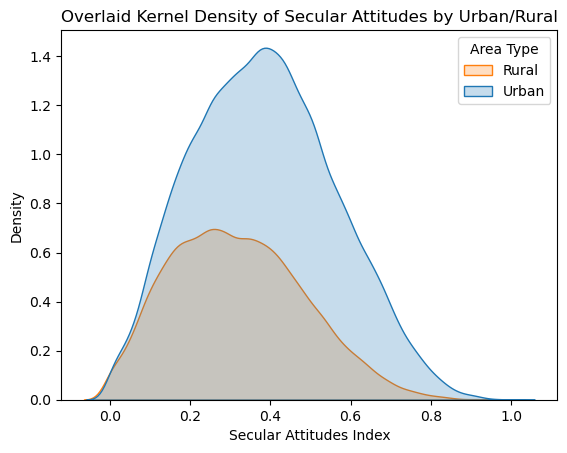

In [70]:
# Question 1, Part A

import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv("WVS7.csv")

# Converting 'sacsecval' to numeric
df['sacsecval'] = pd.to_numeric(df['sacsecval'], errors='coerce')

# Creating the kernel density plot
plt.figure()
sns.kdeplot(data=df, x="sacsecval", hue="H_URBRURAL", fill=True)

plt.xlabel("Secular Attitudes Index")
plt.ylabel("Density")
plt.title("Overlaid Kernel Density of Secular Attitudes by Urban/Rural")

# Creating legend
plt.legend(title="Area Type", labels=["Rural", "Urban"])

plt.show()


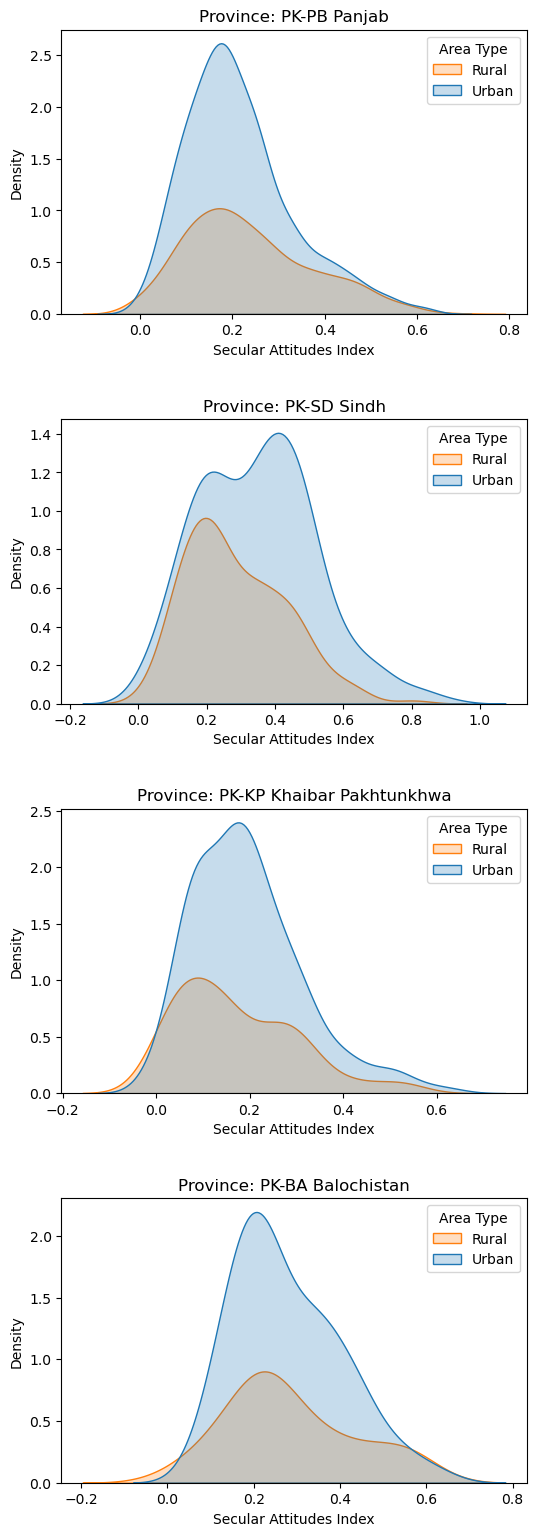

In [74]:
# Question 1, Part B

pakistan_provinces = df[df['B_COUNTRY_ALPHA'] == 'PAK']['N_REGION_ISO'].unique()

fig, axes = plt.subplots(len(pakistan_provinces), 1, figsize=(6, 4 * len(pakistan_provinces))) 

# Function for looping through each province and creating a plot
for i, province in enumerate(pakistan_provinces):
    province_data = df[df['N_REGION_ISO'] == province]

    sns.kdeplot(data=province_data, x="sacsecval", hue="H_URBRURAL", fill=True, ax=axes[i])

    axes[i].set_xlabel("Secular Attitudes Index")
    axes[i].set_ylabel("Density")
    axes[i].set_title(f"Province: {province}")

    axes[i].legend(title="Area Type", labels=["Rural", "Urban"])

plt.tight_layout(pad=3.0) 
plt.show()

#### Question 2

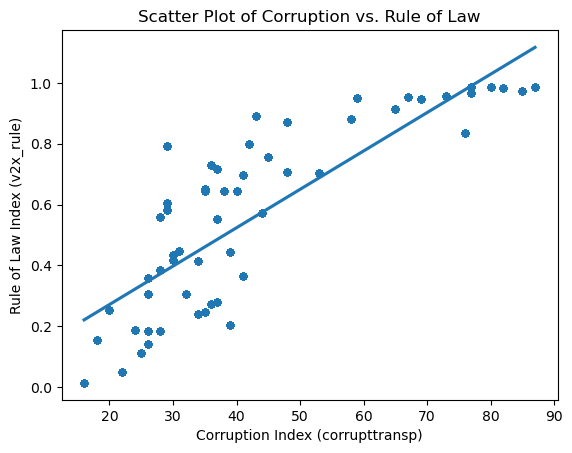

In [76]:
# Question 2, Part A, B, and C

plt.figure() 
sns.regplot(data=df, x="corrupttransp", y="v2x_rule", scatter_kws={'s':20})

# Adding labels and title
plt.xlabel("Corruption Index (corrupttransp)")
plt.ylabel("Rule of Law Index (v2x_rule)")
plt.title("Scatter Plot of Corruption vs. Rule of Law")

plt.show()


# Interpretation:
    # The data shows that there seems to be a strong correlation between the Rule of Law index and 
    # Corruption index, this is also further strengthened by the slope of the line of best fit. 
    # A clearer verdict could be reached by calculating further statistics on the regression line
    # There also seems to be a further pattern that emerges, which shows that at higher levels of the corruption index (above 45, 50),
    # The rule of law index reaches its maximum values of 1.0, this implies that above a certain level of corruption, the rule of law tends to hold regardsless,
    # this can be further investigated using more robust visualization and statistical analysis tools. 

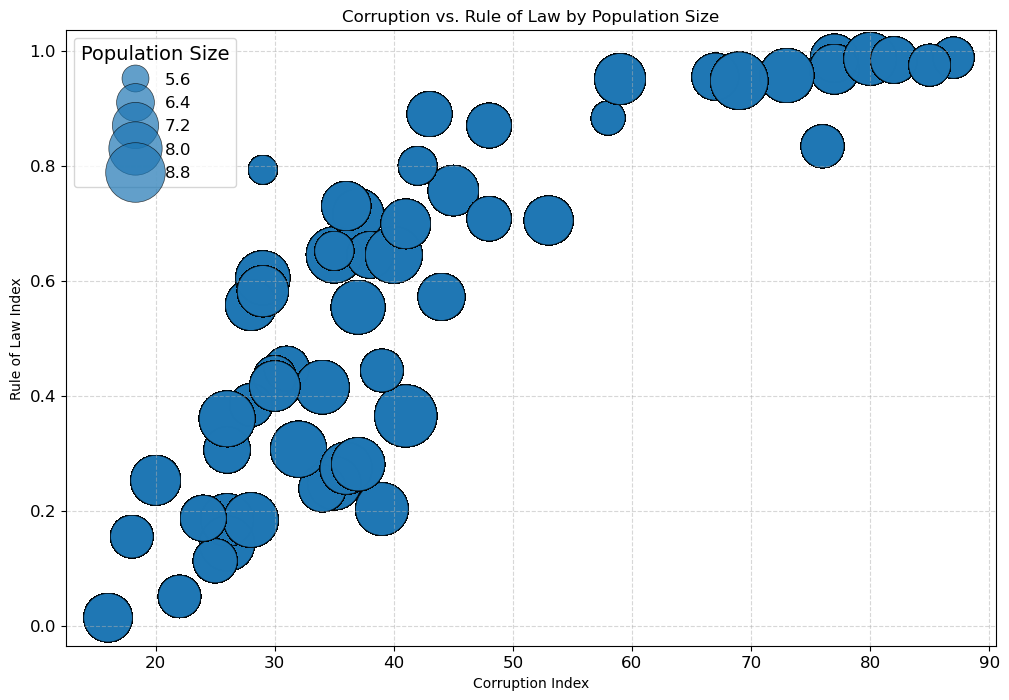

In [871]:
# Question 2, Part D

import numpy as np

# log transforming population variables
df['popWB2019_transformed'] = np.log10(df['popWB2019'] + 1)

plt.figure(figsize=(12, 8)) 

# Scatter plot with point sizes proportional to population
sns.scatterplot(data=df, x="corrupttransp", y="v2x_rule",
                size="popWB2019_transformed",
                sizes=(50, 1000), 
                alpha=0.7,
                linewidth=0.5,  
                edgecolor='black')     
                

plt.xlabel("Corruption Index")
plt.ylabel("Rule of Law Index")
plt.title("Corruption vs. Rule of Law by Population Size")

plt.legend(title="Population Size",  
           fontsize=12,              
           title_fontsize=14)


plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

plt.grid(True, linestyle='--', alpha=0.5) 
plt.show()

In [877]:
# Question 2, Part D Continued

df = pd.read_csv("WVS7.csv") 

# --- Initial Inspection ---
print("First 5 rows of the DataFrame:")
print(df.tail())

print("\nColumn information (names and data types):")
df.info()


print("\nValue range for 'polregfh':")
print(df['polregfh'].unique())

print("\nValue range for 'H_URBRURAL':")
print(df['H_URBRURAL'].unique())

First 5 rows of the DataFrame:
      B_COUNTRY_ALPHA  region              N_REGION_ISO H_URBRURAL  sacsecval  \
88007             ZWE  Africa  ZW-MN Matabeleland North      Urban   0.233889   
88008             ZWE  Africa            ZW-MI Midlands      Urban   0.178889   
88009             ZWE  Africa            ZW-MV Masvingo      Rural   0.248333   
88010             ZWE  Africa          ZW-MA Manicaland      Urban   0.290278   
88011             ZWE  Africa  ZW-MN Matabeleland North      Rural   0.390416   

       resemaval  defiance  relativism  scepticism  autonomy     polregfh  \
88007   0.415694      0.22    0.000000    0.660000  0.333333  Partly free   
88008   0.458333      0.00    0.000000    0.660000  0.333333  Partly free   
88009   0.179583      0.22    0.000000    0.773333  0.000000  Partly free   
88010   0.499583      0.11    0.333333    0.440000  0.333333  Partly free   
88011   0.349120      0.11    0.333333    0.440000  0.000000  Partly free   

       corrupttrans

In [78]:
# Question 2, Part D Continued

# Due to some parsing issue with .dta file I decided to convert the file into csv format and continue the analysis from that. 

dta_file = "WVS7.dta"
csv_file = "WVS7.csv"

df = pd.read_stata(dta_file)
df.to_csv(csv_file, index=False)
print(f"Converted '{dta_file}' to '{csv_file}'")

Converted 'WVS7.dta' to 'WVS7.csv'


In [889]:
# Question 2, Part D Continued

# Data Preprocessing and getting familiar with the data. 

# Converting 'polregfh' to numeric, handling errors
df['polregfh_num'] = pd.to_numeric(df['polregfh'], errors='coerce')

# If conversion created NaNs fill them with a string value that will be replaced in the next step
df['polregfh'] = np.where(df['polregfh_num'].isna(), df['polregfh'], df['polregfh_num'])

# Creating regime category with specified numerical values
df['regime_category'] = df['polregfh'].apply(
    lambda x: 0 if x == 3 or x == "free" else (
        1 if x == 2 or x == "partly free" else 2))

print(df[['polregfh', 'regime_category']].head()) 
print(df['regime_category'].value_counts())     

category_counts = df['regime_category'].value_counts()

print("Counts for each regime category:")
print(category_counts)

<class 'pandas.core.frame.DataFrame'>
Index: 83445 entries, 8 to 88011
Data columns (total 16 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   B_COUNTRY_ALPHA  83445 non-null  object 
 1   region           83445 non-null  object 
 2   N_REGION_ISO     80958 non-null  object 
 3   H_URBRURAL       83413 non-null  object 
 4   sacsecval        83004 non-null  float64
 5   resemaval        82647 non-null  float64
 6   defiance         82962 non-null  float64
 7   relativism       82588 non-null  float64
 8   scepticism       81202 non-null  float64
 9   autonomy         82281 non-null  float64
 10  polregfh         83445 non-null  object 
 11  corrupttransp    83445 non-null  float64
 12  popWB2019        83445 non-null  float64
 13  v2x_rule         83445 non-null  float64
 14  polregfh_num     0 non-null      float64
 15  regime_category  83445 non-null  int64  
dtypes: float64(10), int64(1), object(5)
memory usage: 10.8+ MB
None

In [988]:
# Question 2, Part D Continued
# --- 1. Creating a Country-Level DataFrame and Drop NaNs ---

country_df = df.iloc[:249].copy() 

# Dropping rows with any NaN values in country_df
country_df = country_df.dropna()

print(country_df.info())

# Creating regime category with specified numerical values for each regime type
country_df['regime_category'] = country_df['polregfh'].apply(
    lambda x: 0 if x == 3 or x == "Free" else (
        1 if x == 2 or x == "Partly free" else 2))

print(country_df['regime_category'].value_counts())

print(country_df[['polregfh', 'regime_category']].head())

country_df.to_csv("country_data.csv", index=False)

# For the next task, I had to make this subset dataset from the original file because it did not make sense to have two different types,
# One for country level and one for within country level, it just made the analysis more complicated. 

Country-level data info (after dropping NaNs):
<class 'pandas.core.frame.DataFrame'>
Index: 49 entries, 8 to 248
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   B_COUNTRY_ALPHA  49 non-null     object 
 1   region           49 non-null     object 
 2   N_REGION_ISO     49 non-null     object 
 3   H_URBRURAL       49 non-null     object 
 4   sacsecval        49 non-null     float64
 5   resemaval        49 non-null     float64
 6   defiance         49 non-null     float64
 7   relativism       49 non-null     float64
 8   scepticism       49 non-null     float64
 9   autonomy         49 non-null     float64
 10  polregfh         49 non-null     object 
 11  corrupttransp    49 non-null     float64
 12  popWB2019        49 non-null     float64
 13  v2x_rule         49 non-null     float64
dtypes: float64(9), object(5)
memory usage: 5.7+ KB
None

Country-level regime category counts (after dropping NaNs):


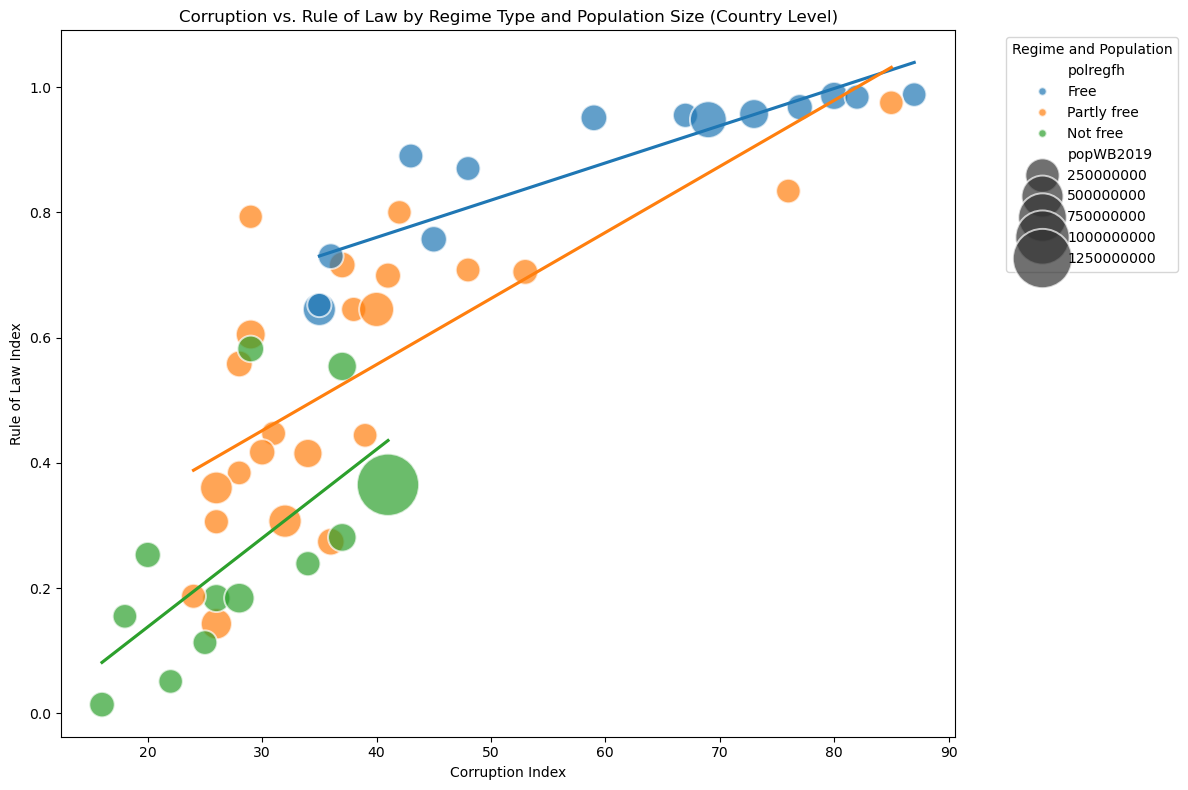

In [82]:
# Question 2, Part D Continued

country_df = pd.read_csv("country_data.csv")

# Converting 'regime_category' to categorical
country_df['regime_category'] = country_df['regime_category'].astype('category')


plt.figure(figsize=(12, 8))
ax = plt.gca() 
regime_labels = {0: "Free", 1: "Partly Free", 2: "Not Free"}
sns.scatterplot(data=country_df, x="corrupttransp", y="v2x_rule",
                hue="polregfh", 
                size="popWB2019",
                sizes=(300, 2000), 
                alpha=0.7, ax=ax,
                legend= True)

# lines of best fit
for category in country_df['regime_category'].cat.categories:
    subset = country_df[country_df['regime_category'] == category]
    sns.regplot(data=subset, x="corrupttransp", y="v2x_rule",
                scatter=False,
                ci=None,
                ax=ax) 

plt.xlabel("Corruption Index")
plt.ylabel("Rule of Law Index")
plt.title("Corruption vs. Rule of Law by Regime Type and Population Size (Country Level)")


handles, labels = ax.get_legend_handles_labels()

# Add legend to the plot (polregfh values)
ax.legend(handles, labels, title="Regime and Population",
          bbox_to_anchor=(1.05, 1), loc='upper left')

plt.tight_layout()
plt.show()


#Interpretation:
    # Yes, there seems to be different relationships between the variables for the different types of regimes. 
    # The data shows that free-regimes, generally tend to be higher on the Rule of Law Index, despite having a low corruption index.
    # Partly-free regimes are those with the strongest positive correlation between the two variables.
    # Not free regimes generally tend to score very poorly on both the corruption index and the rule of law, but there still seems to be a strong correlation between the variables. 

#### Question 3

C:\Users\danyal\AppData\Local\Temp\ipykernel_10288\2258764571.py:3: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_data = country_df.groupby(['region', 'regime_category'])['sacsecval'].mean().reset_index()


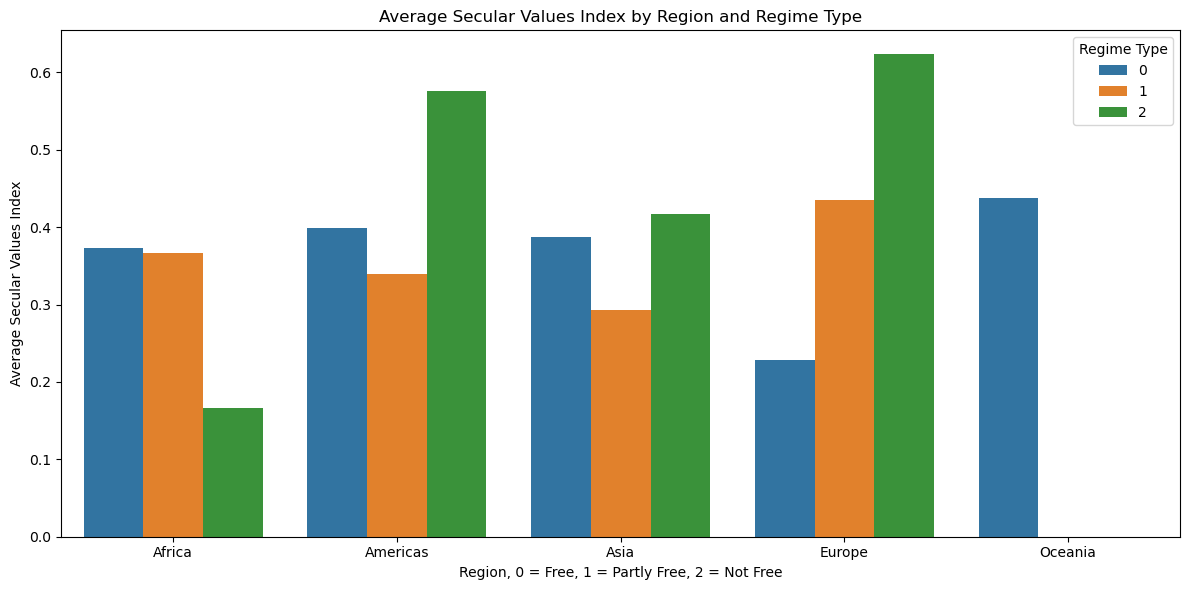

In [85]:
# Question 3 Parts A and B

grouped_data = country_df.groupby(['region', 'regime_category'])['sacsecval'].mean().reset_index()

plt.figure(figsize=(12, 6))
sns.barplot(x='region', y='sacsecval', hue='regime_category', data=grouped_data)

plt.xlabel("Region, 0 = Free, 1 = Partly Free, 2 = Not Free")
plt.ylabel("Average Secular Values Index")
plt.title("Average Secular Values Index by Region and Regime Type")

plt.legend(title="Regime Type")

plt.tight_layout()
plt.show()

#### Question 4

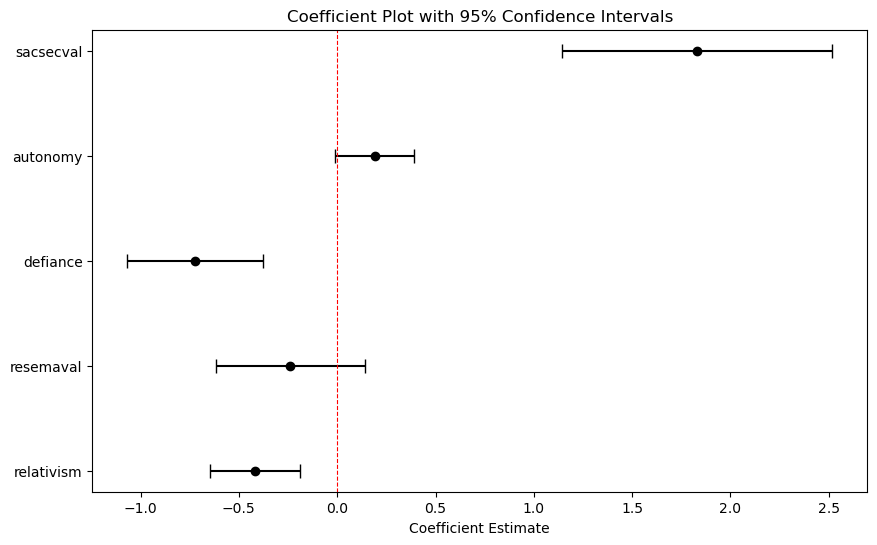

                            OLS Regression Results                            
Dep. Variable:             scepticism   R-squared:                       0.419
Model:                            OLS   Adj. R-squared:                  0.351
Method:                 Least Squares   F-statistic:                     6.194
Date:                Wed, 19 Mar 2025   Prob (F-statistic):           0.000209
Time:                        14:04:34   Log-Likelihood:                 16.642
No. Observations:                  49   AIC:                            -21.28
Df Residuals:                      43   BIC:                            -9.934
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.1790      0.100      1.783      0.0

In [91]:
# Question 4

import statsmodels.formula.api as sm

# Regression Analysis

# Defining independent and dependent variables
dependent_var = 'scepticism'
independent_vars = ['sacsecval', 'autonomy', 'defiance', 'resemaval', 'relativism']

# Regression formula and model
formula = f"{dependent_var} ~ " + " + ".join(independent_vars)

model = sm.ols(formula, data=country_df)
results = model.fit()

# Coefficients and confidence intervals
coef_df = pd.DataFrame({
    'coef': results.params[1:],
    'ci_lower': results.conf_int().iloc[1:, 0],
    'ci_upper': results.conf_int().iloc[1:, 1]
})

coef_df['variable'] = independent_vars


plt.figure(figsize=(10, 6))
ax = plt.gca()

ax.errorbar(y=coef_df['variable'], x=coef_df['coef'],
            xerr=[(coef_df['coef'] - coef_df['ci_lower']), (coef_df['ci_upper'] - coef_df['coef'])],
            fmt='o', color='black', capsize=5)

# Adding a line indicating 0 correlation
ax.axvline(x=0, color='red', linestyle='--', linewidth=0.8)

plt.xlabel("Coefficient Estimate")
plt.title("Coefficient Plot with 95% Confidence Intervals")

ax.invert_yaxis()

plt.show()


print(results.summary()) 
print(f"R-squared: {results.rsquared:.3f}")
print(f"Adjusted R-squared: {results.rsquared_adj:.3f}")
print(f"F-statistic: {results.fvalue:.3f}")
print(f"P-value (F-statistic): {results.f_pvalue:.3f}")
print(f"Number of observations: {results.nobs}") 

# Save regression statistics to an Excel file
overall_stats = {
    'Statistic': ['R-squared', 'Adjusted R-squared', 'F-statistic', 'P-value (F-statistic)', 'Number of observations'],
    'Value': [results.rsquared, results.rsquared_adj, results.fvalue, results.f_pvalue, results.nobs]
}
overall_stats_df = pd.DataFrame(overall_stats)

# Combine overall statistics with coefficient dataframe
with pd.ExcelWriter('regression_results.xlsx') as writer:
    overall_stats_df.to_excel(writer, sheet_name='Overall Statistics', index=False)
    coef_df.to_excel(writer, sheet_name='Coefficients', index=False)

print("\nRegression results (statistics and coefficients) saved to 'regression_results.xlsx'")

### Section 3: Data Analysis

#### Question 1

Done in attached .docx file. 

#### Question 2

In [1094]:
# Question 2, Part A

import pandas as pd

baseline_dta_file = 'baseline_student_level.dta'

baseline_csv_file = 'baseline_student_level.csv'

df_baseline_dta = pd.read_stata(baseline_dta_file)
df_baseline_dta.to_csv(baseline_csv_file, index=False)
print(f"Successfully converted '{baseline_dta_file}' to '{baseline_csv_file}'")

file_path = 'baseline_student_level.csv'

df = pd.read_csv(file_path)

# Fixing score column name
df.rename(columns={'test_socre_baseline': 'test_score_baseline'}, inplace=True)
df.to_csv(file_path, index=False)

treatment_group_column = 'treatment'
baseline_score_column = 'test_score_baseline'

# Descriptive Statistics
print("\nDescriptive Statistics of Baseline Test Scores by Treatment Group:")
print(df.groupby(treatment_group_column)[baseline_score_column].describe())

Successfully converted 'baseline_student_level.dta' to 'baseline_student_level.csv'

Descriptive Statistics of Baseline Test Scores by Treatment Group:
           count       mean        std        min        25%        50%  \
treatment                                                                 
Control    400.0  53.972268  10.358988  19.078695  46.976993  54.018992   
T1         400.0  55.094251  10.887895  25.561790  47.461980  55.058350   
T2         400.0  55.925125   9.927090  29.281214  48.797669  55.294249   

                 75%       max  
treatment                       
Control    60.541936  85.56954  
T1         62.772840  86.86542  
T2         62.921200  87.44307  


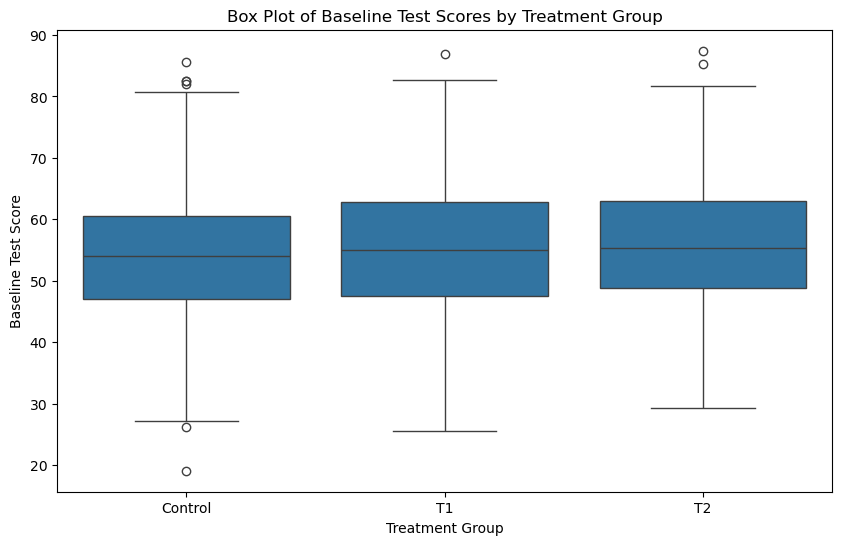

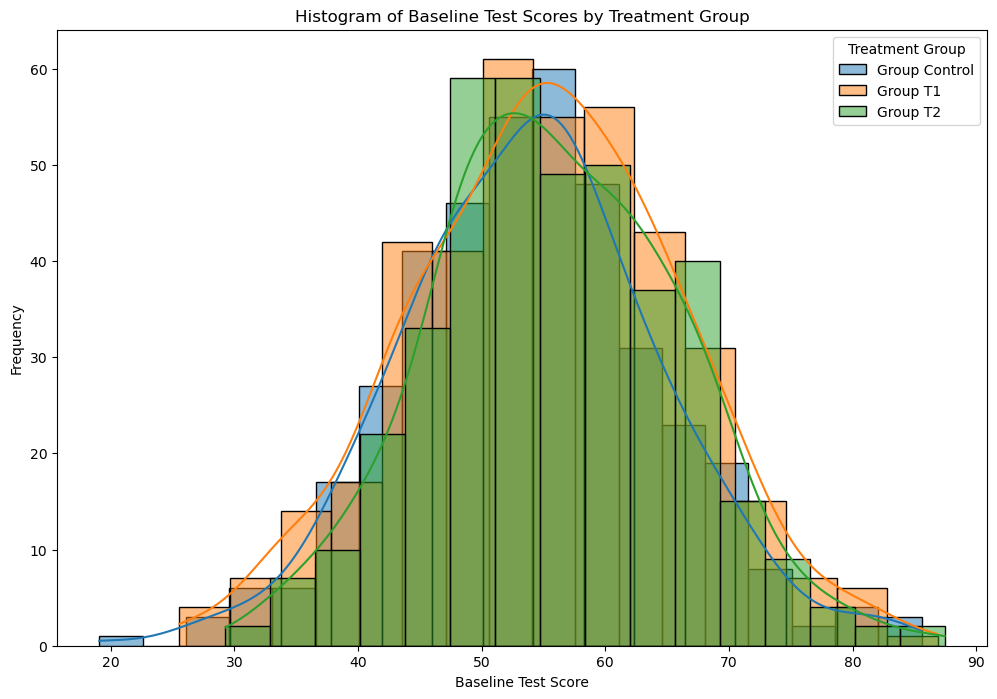

In [1096]:
# Question 2, Part A

import matplotlib.pyplot as plt
import seaborn as sns

# Box Plots
plt.figure(figsize=(10, 6))
sns.boxplot(x=treatment_group_column, y=baseline_score_column, data=df)
plt.title('Box Plot of Baseline Test Scores by Treatment Group')
plt.xlabel('Treatment Group')
plt.ylabel('Baseline Test Score')
plt.show()

# Histograms
treatment_groups = df[treatment_group_column].unique()
plt.figure(figsize=(12, 8))
for group in treatment_groups:
    subset = df[df[treatment_group_column] == group]
    sns.histplot(subset[baseline_score_column], label=f'Group {group}', kde=True)
plt.title('Histogram of Baseline Test Scores by Treatment Group')
plt.xlabel('Baseline Test Score')
plt.ylabel('Frequency')
plt.legend(title='Treatment Group')
plt.show()

#### Question 3

In [1102]:
# Question 3 Part A

endline_dta_file = 'endline_student_level.dta'

endline_csv_file = 'endline_student_level.csv'

df_endline_dta = pd.read_stata(endline_dta_file)
df_endline_dta.to_csv(endline_csv_file, index=False)

df_endline.rename(columns={'treatment_endline': 'treatment'}, inplace=True)

# Merging the two DataFrames based on 'student_id', 'school_id', and 'class_id'
merged_df = pd.merge(df_baseline, df_endline, on=['student_id', 'school_id','section_id', 'class_id', 'treatment'], how='left')

print(merged_df.head())
print(merged_df.tail())

merged_csv_file = 'merged_student_data.csv'
merged_df.to_csv(merged_csv_file, index=False)

   school_id  class_id  section_id  student_id  test_socre_baseline treatment  \
0        1.0       1.0         1.0         1.0            50.182095   Control   
1        1.0       1.0         1.0         2.0            66.047554        T1   
2        1.0       1.0         1.0         3.0            44.069717        T2   
3        1.0       1.0         1.0         4.0            34.018944        T1   
4        1.0       1.0         1.0         5.0            53.089160   Control   

   test_score_endline  
0           58.096153  
1           85.353410  
2           45.052258  
3           46.218613  
4           65.269780  
      school_id  class_id  section_id  student_id  test_socre_baseline  \
1195        8.0       2.0         2.0        34.0            62.302570   
1196        8.0       2.0         2.0        35.0            54.657104   
1197        8.0       2.0         2.0        36.0            45.524357   
1198        8.0       2.0         2.0        37.0            63.907036   

In [1156]:
# Question 3 Part B

import pandas as pd
merged_df = pd.read_csv('merged_student_data.csv')

# Creating dummy variables for treatment groups
merged_df['T1'] = (merged_df['treatment'] == 'T1').astype(int)
merged_df['T2'] = (merged_df['treatment'] == 'T2').astype(int)

# Running ANCOVA regression with dummy variables
model_dummy = smf.ols('test_score_endline ~ T1 + T2 + test_socre_baseline', data=merged_df).fit()

print(model_dummy.summary())

                            OLS Regression Results                            
Dep. Variable:     test_score_endline   R-squared:                       0.796
Model:                            OLS   Adj. R-squared:                  0.795
Method:                 Least Squares   F-statistic:                     1552.
Date:                Wed, 19 Mar 2025   Prob (F-statistic):               0.00
Time:                        01:41:00   Log-Likelihood:                -3846.1
No. Observations:                1200   AIC:                             7700.
Df Residuals:                    1196   BIC:                             7721.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
Intercept               8.6600    

Question 3 Part B Interpretations

The estimated ANCOVA model explains approximately 79.6% of the variance in endline test scores (R-squared = 0.796), indicating a good fit to the data.

Interestingly all the results are statistically significant with a p value of 0.000. 

Intercept (8.66): This is the estimated endline test score for a student in the Control group with a baseline test score of zero, assuming all other predictors are also at their reference level. Which implies that some performance increase is expected.

Treatment 1 (Coefficient = 4.74): The coefficient for Treatment 1 is positive and statistically significant. This suggests that, on average, students in Treatment group 1 scored 4.74 points higher on the endline test compared to students in the Control group, after accounting for differences in their baseline test scores. This is inline with our general assumptions about the impact of the treatment. Given higher tuition scores will increase.

Treatment 2 (Coefficient = -8.73): The highly significant negative coefficient for Treatment 2 is a noteworthy and unexpected finding. Students in Treatment group 2 performed substantially worse on the endline test compared to the Control group, even after controlling for their baseline scores. This result warrants further investigation. It could indicate that the specific intervention in Treatment 2 was not effective, or perhaps even had a detrimental effect on student performance. It's important to consider the nature of the intervention in Treatment 2 to understand potential reasons for this negative correlation.

Baseline Test Score (Coefficient = 1.02): This is also positive and also highly statistically significant with p < 0.001. This indicates a strong positive relationship between baseline and endline test scores. For every one-point increase in the baseline test score, the endline test score is estimated to increase by 1.02 points, after accounting for the treatment groups.

In [55]:
# Question 3 Part C
did_dta_file = 'DiD_data.dta'
did_csv_file = 'DiD_data.csv'

df_did_dta = pd.read_stata(did_dta_file)
df_did_dta.to_csv(did_csv_file, index=False)

C:\Users\danyal\AppData\Local\Temp\ipykernel_10288\3173472195.py:5: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  did_df_stratified['post_binary'] = did_df_stratified['post'].replace({'Pre': 0, 'Post': 1}).astype(int)


In [94]:
# Question 3 Part C Continued

did_csv_file = 'DiD_data.csv'
df = pd.read_csv(did_csv_file)

# Making 'post' a binary variable
df['post_binary'] = df['post'].replace({'Pre': 0, 'Post': 1}).astype(int)

# Making 'treatment' a categorical variable
df['treatment_categorical'] = df['treatment'].replace({1: 'T1', 2: 'T2'}).fillna('Control').astype('category').cat.codes

# Creating dummy variables for Treatment 1 and Treatment 2
df['T1'] = (df['treatment_categorical'] == 1).astype(int)
df['T2'] = (df['treatment_categorical'] == 2).astype(int)

# DiD regression
model = smf.ols(
    formula="test_score ~ T1 + T2 + post_binary + post_binary:T1 + post_binary:T2 + C(school_id) + C(class_id)",
    data=df
).fit()

print(model.summary())

                            OLS Regression Results                            
Dep. Variable:             test_score   R-squared:                       0.205
Model:                            OLS   Adj. R-squared:                  0.201
Method:                 Least Squares   F-statistic:                     47.46
Date:                Wed, 19 Mar 2025   Prob (F-statistic):          3.50e-109
Time:                        14:43:54   Log-Likelihood:                -9211.7
No. Observations:                2400   AIC:                         1.845e+04
Df Residuals:                    2386   BIC:                         1.853e+04
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
Intercept              53.3272    

C:\Users\danyal\AppData\Local\Temp\ipykernel_10288\2517361739.py:7: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['post_binary'] = df['post'].replace({'Pre': 0, 'Post': 1}).astype(int)


Question 3 Part C Interpretation

The statistically significant coefficient for post_binary indicates that, on average, the test scores for the control group increased by approximately 9.69 points from the pre-treatment period to the post-treatment period, after accounting for school and class fixed effects. This suggests a general positive time trend in test scores for the control group.

The coefficients for the treatment dummies in the pre-treatment period are:

T1: 1.1303 (p=0.156), which is not statistically significant at the 0.05 level.

T2: 1.9862 (p=0.013), which is statistically significant. This indicates that Treatment Group 2 had a significantly higher baseline test score (by about 1.99 points) compared to the control group.

The important features of the results are however given by the interaction terms:

post_binary:T1: 4.7646 (p<0.001). This coefficient represents the additional impact of Treatment 1 on the test scores in the post-treatment period compared to the control group's change over time. It suggests that Treatment Group 1 experienced an additional increase of about 4.76 points in their test scores due to the treatment.

post_binary:T2: -8.6897 (p<0.001). This coefficient represents the additional impact of Treatment 2 on the test scores in the post-treatment period compared to the control group's change over time. It suggests that Treatment Group 2 experienced a decrease of about 8.69 points in their test scores due to the treatment, relative to the control group's improvement, this is inline with the results from the ANCOVA resutls from before. 

The coefficients for the school fixed effects school_id[T.2.0] to school_id[T.8.0]) indicate that there are statistically significant differences in average test scores across some schools compared to the reference school. The coefficient for the class fixed effect is not statistically significant at the 0.05 level.

#### Question 4

In [9]:
# Question 4, Part A
baseline_csv_path = 'baseline_student_level_stratified.csv'
endline_csv_path = 'endline_student_level_stratified.csv'

df_baseline = pd.read_csv(baseline_csv_path)
df_endline = pd.read_csv(endline_csv_path)

merged_df = pd.merge(df_baseline, df_endline, on=['school_id', 'section_id', 'class_id', 'student_id'], suffixes=('_baseline', '_endline'))

merged_df.to_csv('merged_student_data_stratified.csv', index=False)
merged_df.rename(columns={'test_socre_baseline': 'test_score_baseline'}, inplace=True)

In [43]:
# Question 4, Part A
# Re-running the ANCOVA regression on the stratified dataset but this time controlling for school and class. 

merged_df_stratified = pd.read_csv('merged_student_data_stratified.csv')

merged_df['T1'] = (merged_df['treatment_endline'] == 'T1').astype(int)
merged_df['T2'] = (merged_df['treatment_endline'] == 'T2').astype(int)

model_dummy = smf.ols('test_score_endline ~ T1 + T2 + test_score_baseline + C(school_id) + C(class_id)', data=merged_df).fit()

print(model_dummy.summary())

                            OLS Regression Results                            
Dep. Variable:     test_score_endline   R-squared:                       0.851
Model:                            OLS   Adj. R-squared:                  0.850
Method:                 Least Squares   F-statistic:                     618.9
Date:                Wed, 19 Mar 2025   Prob (F-statistic):               0.00
Time:                        11:14:53   Log-Likelihood:                -3657.7
No. Observations:                1200   AIC:                             7339.
Df Residuals:                    1188   BIC:                             7400.
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
Intercept               0.8197    

Question 4, Part A Interpretations

The ANCOVA model shows a very high R-squared of 0.850, indicating that 85% of the variance in endline test scores is explained by the treatment groups and the baseline test score. 

The coefficient for test_score_baseline is 1.0051, which is highly statistically significant at p <0.001. Suggesting a strong positive relationship between the baseline and endline test scores.

The coefficients for the treatment groups, relative to the control group, are as follows:

T1 is 12.0406 (p<0.001). This indicates that, on average, students in Treatment Group 1 scored about 12.04 points higher on the endline test compared to the control group, after controlling for their baseline test scores.

T2 is 13.6146 (p<0.001). This indicates that, on average, students in Treatment Group 2 scored about 13.61 points higher on the endline test compared to the control group, after controlling for their baseline test scores. This is a turnaround from the non-stratified dataset, which had a negative coefficient.

Both Treatment Group 1 and Treatment Group 2 had a statistically significant positive impact on students' endline test scores. This indicates that both interventions were effective in improving test outcomes compared to the control group. However, the difference between Treatment 1 and 2 in their response was not that considerable, which implies that the intervention seems to be working. 

The coefficients for the school fixed effects, which is where this model diverges from the one estimated previously, show the differences in endline test scores between each of these schools and the reference school , after controlling for other variables. For instance, students in school ID 5.0 scored significantly higher (1.36 points, p=0.022) than the reference school, however this does not seem to be too insightful as quantifying 1.36 points out of 100 is difficult not to attribute to random chance.

The coefficient for the class fixed effect is not statistically significant, suggesting no significant difference in endline test scores between the two classes, after controlling for other factors.

In [15]:
# Question 4, Part B

dta_file_path = 'DiD_data_stratified.dta'
csv_file_path = dta_file_path.replace('.dta', '.csv')

df = pd.read_stata(dta_file_path)
df.to_csv(csv_file_path, index=False)

In [63]:
# Question 4, Part B Continued

did_csv_file = 'DiD_data_stratified.csv'
df = pd.read_csv(did_csv_file)

df['post_binary'] = df['post'].replace({'Pre': 0, 'Post': 1}).astype(int)
df['treatment'] = df['treatment'].astype('category')

df['T1'] = (df['treatment'] == 'T1').astype(int) # Assuming 'treatment' column now has 'T1', 'T2', 'Control'
df['T2'] = (df['treatment'] == 'T2').astype(int)

# DiD regression
model = smf.ols(
    formula="test_score ~ T1 + T2 + post_binary + post_binary:T1 + post_binary:T2 + C(school_id) + C(class_id)",
    data=df
).fit()

print(model.summary())

                            OLS Regression Results                            
Dep. Variable:             test_score   R-squared:                       0.228
Model:                            OLS   Adj. R-squared:                  0.224
Method:                 Least Squares   F-statistic:                     54.31
Date:                Wed, 19 Mar 2025   Prob (F-statistic):          4.55e-124
Time:                        12:11:58   Log-Likelihood:                -9157.6
No. Observations:                2400   AIC:                         1.834e+04
Df Residuals:                    2386   BIC:                         1.842e+04
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
Intercept              54.6399    

C:\Users\danyal\AppData\Local\Temp\ipykernel_10288\3068555751.py:6: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['post_binary'] = df['post'].replace({'Pre': 0, 'Post': 1}).astype(int)


Question 4, Part B Interpretations

The estimated average test score for the control group in the pre-treatment period is approximately 54.64. The coefficient of 1.3013 (p=0.040) suggests that, on average, the test scores for the control group increased by about 1.30 points from the pre-treatment to the post-treatment period, after controlling for school and class.

The coefficient of 12.0382 (p<0.001) is the DiD estimate for Treatment 1. It indicates that Treatment Group 1 experienced an additional increase of approximately 12.04 points in their test scores from the pre-treatment to the post-treatment period, compared to the control group. The coefficient of 13.6128 (p<0.001) is the DiD estimate for Treatment 2. It indicates that Treatment Group 2 experienced an additional increase of approximately 13.61 points in their test scores from the pre-treatment to the post-treatment period, compared to the control group, this again is different from the first test, where the coefficient was negative for T2. Similar to the previous DiD model, some school fixed effects are statistically significant, indicating differences in average test scores across schools. The class fixed effect is not significant at the 0.05 level.

The estimated treatment effects for both T1 (12.04) and T2 (13.61) from this DiD model are consistent with the coefficients obtained from the second ANCOVA model (T1: 12.04, T2: 13.61), which controlled for school and class fixed effects. This consistency across different methodologies (ANCOVA and DiD) when properly specified strengthens the confidence in these findings.

The results from this second DiD model now show positive and significant effects for both treatments, which contrasts with the negative effect observed for Treatment 2 in the first ANCOVA DiD attempts. This suggests that controlling for school and class differences is crucial for accurately estimating the treatment effects in this context.


Question 4, Part C
Analysis on how stratification changed the results for the two regressions.

The initial round of analyses, consisting of an ANCOVA model without explicit controls for school and class and the DiD regression, presented a mixed picture of the treatment effects. Both models indicated a positive impact of Treatment 1 on test scores. However, a surprising finding was the statistically significant negative impact of Treatment 2 in both analyses. The first ANCOVA suggested that Treatment 2 led to lower endline scores, while the DiD results suported these findings. These results were counterintuitive and raised questions about the effectiveness of Treatment 2.

The second round of experiments involved analyzing data from a stratified sample, with a focus on controlling for school and class level differences. The second ANCOVA model, which included fixed effects for schools and classes, revealed a significantly different outcome. Both Treatment 1 and Treatment 2 showed substantial positive impacts on endline test scores, with Treatment 2 exhibiting a slightly larger effect than Treatment 1. Similarly, the second DiD regression also demonstrated positive and significant additional increases in test scores for both Treatment 1 and Treatment 2 over time, relative to the control group.

The implementation of stratification clearly played a crucial role in changing the observed results, particularly for Treatment 2. The negative impact seen in the initial analyses was completely reversed to a strong positive impact in the analyses of the stratified data. Furthermore, the magnitude of the positive effect for Treatment 1 also increased. This indicates that the initial findings were likely confounded by factors related to the structure of the data that were not adequately addressed without stratification and the inclusion of school and class controls.

The stratification strategy, which aimed to ensure a more balanced distribution of students with different characteristics across the treatment groups. By subsequently controlling for school and class fixed effects in the ANCOVA and DiD models, the analyses were able to account for pre-existing differences in student performance or other contextual factors at these levels. The reversal of the Treatment 2 effect suggests that, in the non-stratified analyses, Treatment 2 might have been inadvertently associated with lower-performing schools or classes, leading to the spurious negative correlation. Stratification and the inclusion of fixed effects helped to isolate the true effect of the treatment by accounting for this underlying structure and potential imbalances.
